# List Of Libraries Used

In [1]:
# import PyPDF2 as pp
# import docx2txt
# import pandas as pd # 
# from nltk.stem import WordNetLemmatizer
# import os
# import nltk
# import nltk.corpus
# from nltk.tokenize import word_tokenize
# import re
# import string
# from nltk.probability import FreqDist
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords 
# from collections import Counter

In [2]:
# Basic feature extraction using text data
#     Number of words
#     Number of characters
#     Average word length
#     Number of stopwords
#     Number of special characters
#     Number of numerics
#     Number of uppercase words
# Basic Text Pre-processing of text data
#     Lower casing
#     Punctuation removal
#     Stopwords removal
#     Frequent words removal
#     Rare words removal
#     Spelling correction
#     Tokenization
#     Stemming
#     Lemmatization
    # Advance Text Processing
#     N-grams
#     Term Frequency
#     Inverse Document Frequency
#     Term Frequency-Inverse Document Frequency (TF-IDF)
#     Bag of Words
#     Sentiment Analysis
#     Word Embedding

# Importing Text From PDF & Cleaning For Processing

In [3]:
import PyPDF2 as pp
PDFfile = open("Rachel Sumekh - Non Profit -Swipeout Hunger.pdf","rb")
pdfread =pp.PdfFileReader(PDFfile)

In [4]:
text = ""
i = 0
while i < pdfread.getNumPages():
    pageinfo = pdfread.getPage(i)
    text = text + " " + pageinfo.extractText()
    i = i + 1

In [5]:
text

' At Garden Spot Village, the core value of service flows through every aspect of life, including dining. \nRecently, Garden Spot Village residents began to donate unused meal dollars to fund a community meal \nthrough a Swipe Out Hunger campaign.\n \nWhen \nColleen Musselman, director of life enrichment, realized a national Swipe Out Hunger organization, \ngeared towards college and university students existed, she contacted them. Soon after, Garden Spot Village \nofficially became the first retirement community \nto affiliate with Swipe Out Hunger.\n \nRachel Sumekh, CEO of the nonprofit Swipe out Hunger, said the organization was founded in 2010 when she \nand her friends were students at UCLA. They saw a disparity between students having too much food and \nmembers of th\n\n\ngrown to 23 chapters on college and community campuses and the chapters have \ndonated 1.2 million meals to \ncommunity members and college students through meal vouchers and college food banks. They are excit

In [6]:
text = text.replace("\n",'')

In [7]:
len(text)

24593

In [8]:
text

' At Garden Spot Village, the core value of service flows through every aspect of life, including dining. Recently, Garden Spot Village residents began to donate unused meal dollars to fund a community meal through a Swipe Out Hunger campaign. When Colleen Musselman, director of life enrichment, realized a national Swipe Out Hunger organization, geared towards college and university students existed, she contacted them. Soon after, Garden Spot Village officially became the first retirement community to affiliate with Swipe Out Hunger. Rachel Sumekh, CEO of the nonprofit Swipe out Hunger, said the organization was founded in 2010 when she and her friends were students at UCLA. They saw a disparity between students having too much food and members of thgrown to 23 chapters on college and community campuses and the chapters have donated 1.2 million meals to community members and college students through meal vouchers and college food banks. They are excited to include Garden Spot Village 

In [9]:
import re
import string
def clean_text_1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_1(x)

In [10]:
text = clean_text_1(text)

In [11]:
text

' at garden spot village the core value of service flows through every aspect of life including dining recently garden spot village residents began to donate unused meal dollars to fund a community meal through a swipe out hunger campaign when colleen musselman director of life enrichment realized a national swipe out hunger organization geared towards college and university students existed she contacted them soon after garden spot village officially became the first retirement community to affiliate with swipe out hunger rachel sumekh ceo of the nonprofit swipe out hunger said the organization was founded in  when she and her friends were students at ucla they saw a disparity between students having too much food and members of thgrown to  chapters on college and community campuses and the chapters have donated  million meals to community members and college students through meal vouchers and college food banks they are excited to include garden spot village in their efforts and see 

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
text_token = word_tokenize(text)
len(text_token)

4055

In [13]:
# word_per_sentence = len(text_token)/len(sent_token)
# syllable_per_word = len(text)/len(text_token)
# word_per_sentence
# syllable_per_word

In [14]:
text = text.replace("  "," ")
#use for loop for cases in which more than even 2 space

In [15]:
text

' at garden spot village the core value of service flows through every aspect of life including dining recently garden spot village residents began to donate unused meal dollars to fund a community meal through a swipe out hunger campaign when colleen musselman director of life enrichment realized a national swipe out hunger organization geared towards college and university students existed she contacted them soon after garden spot village officially became the first retirement community to affiliate with swipe out hunger rachel sumekh ceo of the nonprofit swipe out hunger said the organization was founded in when she and her friends were students at ucla they saw a disparity between students having too much food and members of thgrown to chapters on college and community campuses and the chapters have donated million meals to community members and college students through meal vouchers and college food banks they are excited to include garden spot village in their efforts and see opp

In [16]:
# from nltk.tokenize import word_tokenize, sent_tokenize

# sent_token = sent_tokenize(text)
# len(text_token)

# Removing Stop Word

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))   
filtered_sentence = [w for w in text_token if not w in stop_words]  
filtered_sentence = [] 
for w in text_token: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
print(len(text_token)) 
print(len(filtered_sentence)) 

4055
2246


In [61]:
len(text)

23279

# Lemmatizing

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in filtered_sentence])
print(len(lemmatized_output))

16032


In [19]:
clean_data = word_tokenize(lemmatized_output)

In [60]:
len(clean_data)

2246

In [21]:
import pickle

In [22]:
with open('clean_data.pkl', 'wb') as f:
    pickle.dump(clean_data, f)

In [23]:
from nltk.probability import FreqDist
fdist = FreqDist()
for words in clean_data:
    fdist[words] += 1
fdist

FreqDist({'student': 47, 'swipe': 35, 'est': 35, 'meal': 33, 'food': 28, 'university': 27, 'hunger': 25, 'campus': 21, 'college': 20, 'homeless': 19, ...})

In [24]:
len(fdist)

1091

In [25]:
from collections import Counter
final_freq = Counter(fdist).most_common(1091)

In [26]:

type(fdist)

nltk.probability.FreqDist

In [27]:
type(final_freq)

list

In [63]:
top_30 = final_freq[:30]

In [68]:
for i in df[0]:
    top_30_pos_tag = nltk.pos_tag(df[0])
top_30_pos_tag

[('student', 'NN'),
 ('swipe', 'NN'),
 ('est', 'JJS'),
 ('meal', 'NN'),
 ('food', 'NN'),
 ('university', 'NN'),
 ('hunger', 'NN'),
 ('campus', 'NN'),
 ('college', 'NN'),
 ('homeless', 'NN'),
 ('community', 'NN'),
 ('first', 'RB'),
 ('ucla', 'JJ'),
 ('sumekh', 'NN'),
 ('people', 'NNS'),
 ('time', 'NN'),
 ('dining', 'VBG'),
 ('life', 'NN'),
 ('said', 'VBD'),
 ('many', 'JJ'),
 ('need', 'VBP'),
 ('change', 'VBP'),
 ('organization', 'NN'),
 ('get', 'NN'),
 ('point', 'NN'),
 ('year', 'NN'),
 ('hall', 'NN'),
 ('work', 'NN'),
 ('moment', 'NN'),
 ('want', 'VBP'),
 ('rachel', 'JJ'),
 ('new', 'JJ'),
 ('program', 'NN'),
 ('uc', 'JJ'),
 ('village', 'NN'),
 ('every', 'DT'),
 ('million', 'CD'),
 ('volunteer', 'NN'),
 ('hungry', 'JJ'),
 ('one', 'CD'),
 ('garden', 'NN'),
 ('spot', 'NN'),
 ('member', 'NN'),
 ('opportunity', 'NN'),
 ('also', 'RB'),
 ('open', 'JJ'),
 ('president', 'NN'),
 ('would', 'MD'),
 ('champion', 'VB'),
 ('like', 'IN'),
 ('closet', 'NN'),
 ('know', 'VBP'),
 ('way', 'NN'),
 ('differe

In [110]:
top_30_pos_tag_df = pd.

In [124]:
top_30_pos_tag_df.add_suffix('Ashu')

,0Ashu,1Ashu
0,student,NN
1,swipe,NN
2,est,JJS
3,meal,NN
4,food,NN
...,...,...
1086,interest,NN
1087,grow,NN
1088,desire,NN
1089,guide,NN


In [83]:
POS = []
POS.append(top_30_pos_tag[0][1])
for i in top_30_pos_tag:
   # x = 'dum'
    for j in POS:
           POS[j][1]=0
           if (POS[j]==top_30_pos_tag[i][1]):
               POS[j][1]=POS[j][1]+1
               break
           else:
               POS.append(top_30_pos_tag[i][1])
POS

TypeError: list indices must be integers or slices, not str

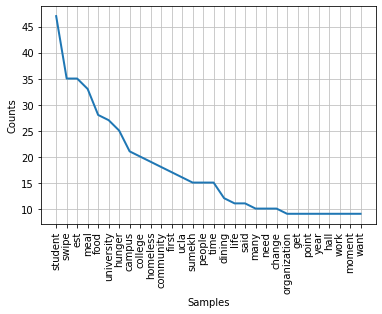

In [29]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# Drawing WordCloud

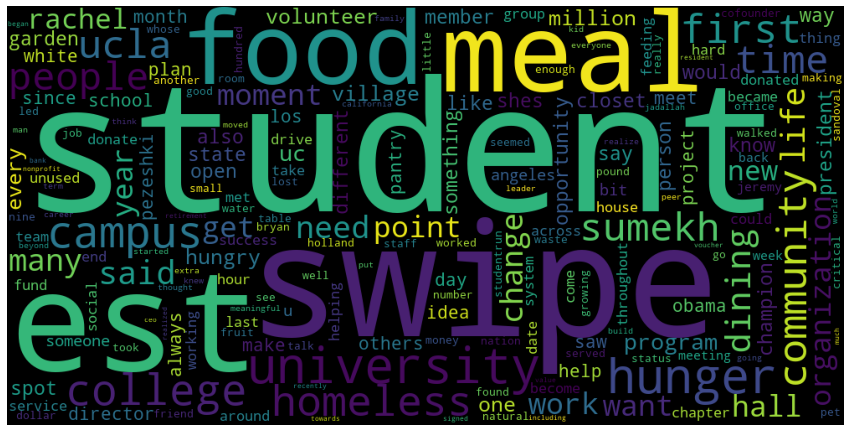

In [30]:
from wordcloud import WordCloud

word_could_dict=Counter(fdist)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(fdist)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

<!-- Word Cloud Analysis -   -->

In [31]:
# Students of colleges and campuses are involving organisation and universities for food and hunger related issues 

In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.DataFrame(final_freq)

In [34]:
# import pandas as pd

# data = pd.read_pickle('clean_data.pkl')
# data

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df.head()

,0,1
0,student,47
1,swipe,35
2,est,35
3,meal,33
4,food,28


In [37]:
# repeating_word = df[df[1]>1]

In [38]:
# unique_word = repeating_word[0]

In [39]:
repeating_word_10 = df[df[1]>10]

In [40]:
df

,0,1
0,student,47
1,swipe,35
2,est,35
3,meal,33
4,food,28
...,...,...
1086,interest,1
1087,grow,1
1088,desire,1
1089,guide,1


In [41]:
clean_data

['garden',
 'spot',
 'village',
 'core',
 'value',
 'service',
 'flow',
 'every',
 'aspect',
 'life',
 'including',
 'dining',
 'recently',
 'garden',
 'spot',
 'village',
 'resident',
 'began',
 'donate',
 'unused',
 'meal',
 'dollar',
 'fund',
 'community',
 'meal',
 'swipe',
 'hunger',
 'campaign',
 'colleen',
 'musselman',
 'director',
 'life',
 'enrichment',
 'realized',
 'national',
 'swipe',
 'hunger',
 'organization',
 'geared',
 'towards',
 'college',
 'university',
 'student',
 'existed',
 'contacted',
 'soon',
 'garden',
 'spot',
 'village',
 'officially',
 'became',
 'first',
 'retirement',
 'community',
 'affiliate',
 'swipe',
 'hunger',
 'rachel',
 'sumekh',
 'ceo',
 'nonprofit',
 'swipe',
 'hunger',
 'said',
 'organization',
 'founded',
 'friend',
 'student',
 'ucla',
 'saw',
 'disparity',
 'student',
 'much',
 'food',
 'member',
 'thgrown',
 'chapter',
 'college',
 'community',
 'campus',
 'chapter',
 'donated',
 'million',
 'meal',
 'community',
 'member',
 'college',


In [42]:
df.head()

,0,1
0,student,47
1,swipe,35
2,est,35
3,meal,33
4,food,28


In [107]:
df_polarity = df[df.polarity != 0]
df_pos_polarity = df[df.polarity > 0]
df_neg_polarity = df[df.polarity < 0]


In [55]:
df_polarity

,0,1,sentiment,subjectivity,polarity
11,first,17,"(0.25, 0.3333333333333333)",0.333333,0.250000
19,many,10,"(0.5, 0.5)",0.500000,0.500000
31,new,8,"(0.13636363636363635, 0.45454545454545453)",0.454545,0.136364
101,hard,4,"(-0.2916666666666667, 0.5416666666666666)",0.541667,-0.291667
111,success,4,"(0.3, 0.0)",0.000000,0.300000
...,...,...,...,...,...
1063,ready,1,"(0.2, 0.5)",0.500000,0.200000
1070,game,1,"(-0.4, 0.4)",0.400000,-0.400000
1071,favorite,1,"(0.5, 1.0)",1.000000,0.500000
1075,round,1,"(-0.2, 0.4)",0.400000,-0.200000


In [56]:
df[polarity].plot.kde()

NameError: name 'polarity' is not defined

In [106]:
df[df.subjectivity > 0]

,word,frequency,sentiment,subjectivity,polarity
11,first,17,"(0.25, 0.3333333333333333)",0.333333,0.250000
19,many,10,"(0.5, 0.5)",0.500000,0.500000
31,new,8,"(0.13636363636363635, 0.45454545454545453)",0.454545,0.136364
45,open,6,"(0.0, 0.5)",0.500000,0.000000
53,different,6,"(0.0, 0.6)",0.600000,0.000000
...,...,...,...,...,...
1071,favorite,1,"(0.5, 1.0)",1.000000,0.500000
1072,short,1,"(0.0, 0.3)",0.300000,0.000000
1075,round,1,"(-0.2, 0.4)",0.400000,-0.200000
1077,personal,1,"(0.0, 0.3)",0.300000,0.000000


In [108]:
df_pos_polarity

,word,frequency,sentiment,subjectivity,polarity
11,first,17,"(0.25, 0.3333333333333333)",0.333333,0.250000
19,many,10,"(0.5, 0.5)",0.500000,0.500000
31,new,8,"(0.13636363636363635, 0.45454545454545453)",0.454545,0.136364
111,success,4,"(0.3, 0.0)",0.000000,0.300000
112,social,4,"(0.03333333333333333, 0.06666666666666667)",0.066667,0.033333
...,...,...,...,...,...
1049,sure,1,"(0.5, 0.8888888888888888)",0.888889,0.500000
1056,enthusiastic,1,"(0.6, 0.9)",0.900000,0.600000
1063,ready,1,"(0.2, 0.5)",0.500000,0.200000
1071,favorite,1,"(0.5, 1.0)",1.000000,0.500000


In [109]:
len(df_neg_polarity)

29

In [ ]:
df_neg_polarity

In [ ]:
df[df.sentiment == 0.0]

In [47]:
for i in clean_data:
    clean_data_pos_tag = nltk.pos_tag(clean_data)
clean_data_pos_tag

[('garden', 'NN'),
 ('spot', 'NN'),
 ('village', 'NN'),
 ('core', 'NN'),
 ('value', 'NN'),
 ('service', 'NN'),
 ('flow', 'NN'),
 ('every', 'DT'),
 ('aspect', 'JJ'),
 ('life', 'NN'),
 ('including', 'VBG'),
 ('dining', 'VBG'),
 ('recently', 'RB'),
 ('garden', 'VBN'),
 ('spot', 'NN'),
 ('village', 'NN'),
 ('resident', 'NN'),
 ('began', 'VBD'),
 ('donate', 'JJ'),
 ('unused', 'JJ'),
 ('meal', 'NN'),
 ('dollar', 'NN'),
 ('fund', 'NN'),
 ('community', 'NN'),
 ('meal', 'VBP'),
 ('swipe', 'JJ'),
 ('hunger', 'NN'),
 ('campaign', 'NN'),
 ('colleen', 'JJ'),
 ('musselman', 'NN'),
 ('director', 'NN'),
 ('life', 'NN'),
 ('enrichment', 'NN'),
 ('realized', 'VBN'),
 ('national', 'JJ'),
 ('swipe', 'NN'),
 ('hunger', 'NN'),
 ('organization', 'NN'),
 ('geared', 'VBN'),
 ('towards', 'NNS'),
 ('college', 'NN'),
 ('university', 'NN'),
 ('student', 'NN'),
 ('existed', 'VBD'),
 ('contacted', 'VBN'),
 ('soon', 'RB'),
 ('garden', 'JJ'),
 ('spot', 'NN'),
 ('village', 'NN'),
 ('officially', 'RB'),
 ('became', 'VBD

In [100]:
df['sentiment'] = df[0].apply(lambda x: TextBlob(x).sentiment)

In [101]:
df['subjectivity'] = df[0].apply(lambda x: TextBlob(x).subjectivity)
df['polarity'] = df[0].apply(lambda x: TextBlob(x).polarity)

In [102]:
df

,0,1,sentiment,subjectivity,polarity
0,student,47,"(0.0, 0.0)",0.0,0.0
1,swipe,35,"(0.0, 0.0)",0.0,0.0
2,est,35,"(0.0, 0.0)",0.0,0.0
3,meal,33,"(0.0, 0.0)",0.0,0.0
4,food,28,"(0.0, 0.0)",0.0,0.0
...,...,...,...,...,...
1086,interest,1,"(0.0, 0.0)",0.0,0.0
1087,grow,1,"(0.0, 0.0)",0.0,0.0
1088,desire,1,"(0.0, 0.0)",0.0,0.0
1089,guide,1,"(0.0, 0.0)",0.0,0.0


In [ ]:
df.plot(kind='line',x='polarity' y = "")

In [59]:
type(clean_data_pos_tag)

list

In [49]:
from textblob import TextBlob

In [ ]:
print(TextBlob(clean_data[12]).sentiment.polarity)

In [ ]:
del df['sentiment']

In [ ]:
df

In [ ]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

In [ ]:
type(pol)

In [103]:
df = df.rename(columns ={0: 'word'})

In [104]:
df = df.rename(columns ={1: 'frequency'})

In [105]:
df.describe()

,frequency,subjectivity,polarity
count,1091.000000,1091.000000,1091.000000
mean,2.058662,0.063012,0.014471
std,3.282459,0.198896,0.121965
min,1.000000,0.000000,-1.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,47.000000,1.000000,1.000000


In [ ]:
from pandas_profiling import ProfileReport
report= ProfileReport(df, title='Pandas Profiling', explorative= True)
report.to_widgets()

In [84]:
from nltk import ngrams

In [85]:
bigrams = ngrams(clean_data,2)

In [ ]:
bigrams

In [86]:
bi = list(bigrams)

In [88]:
len(bi)

2245

In [95]:
trigrams = ngrams(clean_data,3)

In [96]:
tri = list(trigrams)

In [91]:
tri

[('garden', 'spot', 'village'),
 ('spot', 'village', 'core'),
 ('village', 'core', 'value'),
 ('core', 'value', 'service'),
 ('value', 'service', 'flow'),
 ('service', 'flow', 'every'),
 ('flow', 'every', 'aspect'),
 ('every', 'aspect', 'life'),
 ('aspect', 'life', 'including'),
 ('life', 'including', 'dining'),
 ('including', 'dining', 'recently'),
 ('dining', 'recently', 'garden'),
 ('recently', 'garden', 'spot'),
 ('garden', 'spot', 'village'),
 ('spot', 'village', 'resident'),
 ('village', 'resident', 'began'),
 ('resident', 'began', 'donate'),
 ('began', 'donate', 'unused'),
 ('donate', 'unused', 'meal'),
 ('unused', 'meal', 'dollar'),
 ('meal', 'dollar', 'fund'),
 ('dollar', 'fund', 'community'),
 ('fund', 'community', 'meal'),
 ('community', 'meal', 'swipe'),
 ('meal', 'swipe', 'hunger'),
 ('swipe', 'hunger', 'campaign'),
 ('hunger', 'campaign', 'colleen'),
 ('campaign', 'colleen', 'musselman'),
 ('colleen', 'musselman', 'director'),
 ('musselman', 'director', 'life'),
 ('direct

In [97]:
len(tri)

2244

In [94]:
quadgram = ngrams(clean_data,4)

In [98]:
quad = list(quadgram)

In [99]:
len(quad)

2243